In [5]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import eigvals
from itertools import combinations

In [25]:
def generate_subsets(n):
    # Generate all possible subsets of size 1 to n.
    for size in range(1, n + 1):
        for subset in combinations(range(n), size):
            yield subset
            # print(subset)

def check_p(matrix):
    n = len(matrix)

    # Compute the determinant of the whole matrix first.
    determinant = np.linalg.det(matrix)
    if determinant <= 0:
        return False  # Return immediately if the whole matrix has a non-positive determinant

    # Check the determinants of diagonal elements (smallest subset) next.
    for i in range(n):
        submatrix = matrix[i, i]
        if submatrix <= 0:
            return False  # Return immediately if any diagonal element is non-positive

    # Initialize the generator to get subsets.
    subset_generator = generate_subsets(n)

    # Check the determinants of other subsets.
    for subset in subset_generator:
        if len(subset) > 1:
            submatrix = matrix[np.ix_(subset, subset)]
            determinant = np.linalg.det(submatrix)
            if determinant <= 0:
                return False  # Return immediately if a non-positive determinant is found

    return True # Return True if all determinants are positive


In [26]:
# def generate_non_symmetric_matrix(n):
#     # Generate a random matrix with values between -1 and 1
#     matrix = np.random.uniform(-1, 1, (n, n))

#     # Set diagonal elements to 1
#     np.fill_diagonal(matrix, 1)

#     # Check sub-matrix determinants and adjust as needed
#     for i in range(n):
#         for j in range(i + 1, n):
#             sub_matrix = matrix[:j+1, :j+1]  # Extract sub-matrix
#             while np.linalg.det(sub_matrix) < 0:
#                 # Find a random element in the sub-matrix
#                 row_idx, col_idx = np.random.randint(0, j+1), np.random.randint(0, j+1)
#                 # Flip the sign of the element
#                 matrix[row_idx, col_idx] *= -1
    
#     return matrix

# # Define the size of the matrix (change n to your desired value)
# n = 10
# result_matrix = generate_non_symmetric_matrix(n)
# print(result_matrix)

def generate_matrix(n):
    # Generate a random matrix with values between -1 and 1
    matrix = np.random.uniform(-1, 1, (n, n))

    # Set diagonal elements to 1
    np.fill_diagonal(matrix, 1)
    
    return matrix


In [23]:
n = 3
iterations = 5000
kappa = 0.5
all_p = 0
G1_p_G2_p_G_n = 0
G1_n_G2_p_G_p = 0
G1_n_G2_p_G_n = 0
G1_n_G2_n_G_p = 0
non_p = 0

for i in range(iterations):
    G1 = generate_matrix(n)
    G2 = generate_matrix(n)
    G = kappa * G1 + (1 - kappa) * G2
    result1 = check_p(G1)
    result2 = check_p(G2)
    result = check_p(G)
    
    if result1 & result2 & result:
        all_p += 1
    elif result1 & result2 & (not result):
        G1_p_G2_p_G_n += 1
    elif (result1 & (not result2) & result) or ((not result1) and result2 and result):
        G1_n_G2_p_G_p += 1
    elif (result1 & (not result2) & (not result)) or ((not result1) and result2 and (not result)):
        G1_n_G2_p_G_n += 1
    elif (not result1) and (not result2) and result:
        G1_n_G2_n_G_p += 1
    elif (not result1) and (not result2) and (not result):
        non_p += 1

    
print("layers have a unique NE and so does the Multiplex: ", all_p)
print("layers have a unique NE but the Multiplex does not: ", G1_p_G2_p_G_n)
print("only one layer has a unique NE and so does the Multiplex: ", G1_n_G2_p_G_p)
print("only one layer has a unique NE but the Multiplex does not: ", G1_n_G2_p_G_n)
print("no layer has a unique NE but the Multiplex does: ", G1_n_G2_n_G_p)
print("no layer has a unique NE and neither does the Multiplex: ", non_p)
print("total: ", all_p + G1_p_G2_p_G_n + G1_n_G2_p_G_p + G1_n_G2_p_G_n + G1_n_G2_n_G_p + non_p)

# categories = ['Layers and Multiplex \u2192 NE', 'Both layers \u2192 NE\nMultiplex \u219B NE', 'One layer \u2192 NE\nMultiplex \u2192 NE', 'One layer \u2192 NE\nmultiplex \u219B NE', 'Neither the layers nor\nthe Multiplex with NE']


layers have a unique NE and so does the Multiplex:  4536
layers have a unique NE but the Multiplex does not:  0
only one layer has a unique NE and so does the Multiplex:  442
only one layer has a unique NE but the Multiplex does not:  12
no layer has a unique NE but the Multiplex does:  8
no layer has a unique NE and neither does the Multiplex:  2
total:  5000


/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_40928/2043833196.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


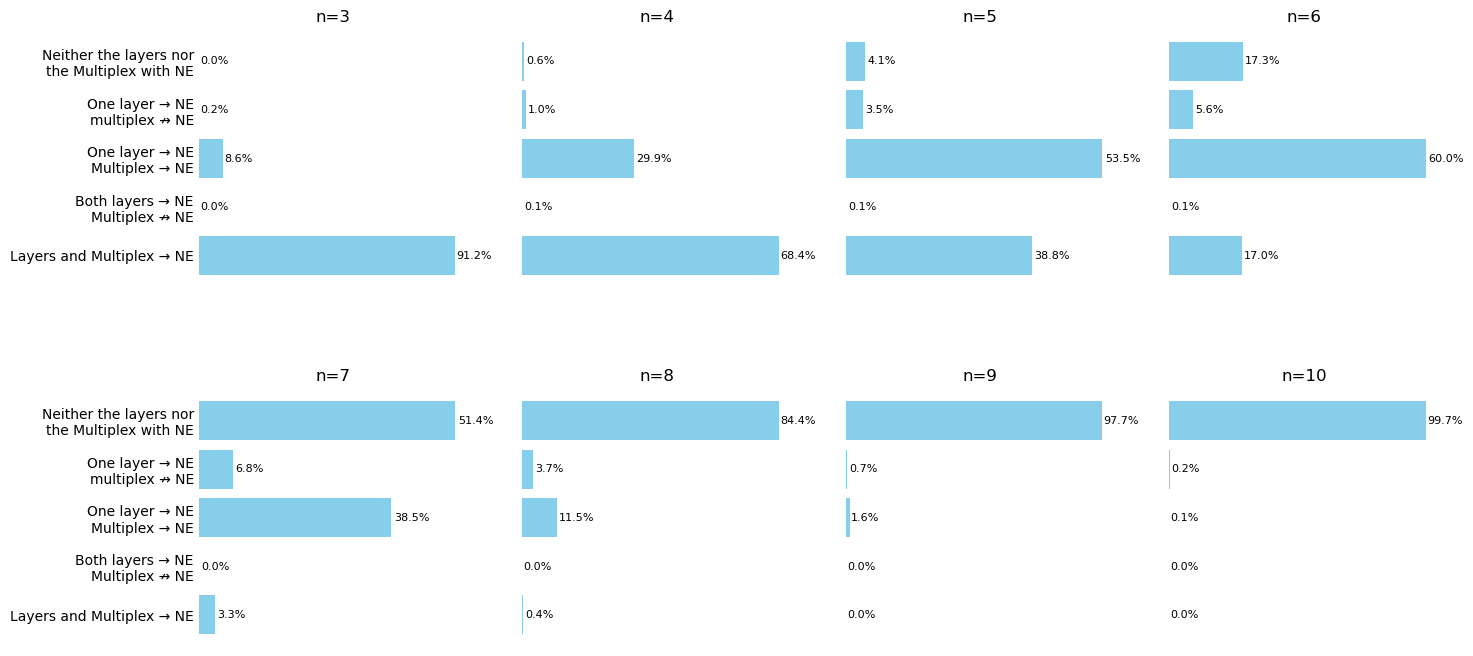

In [32]:
n_list = [3, 4, 5, 6, 7, 8, 9, 10]

# Setting up subplots with shared y-axis
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

for i, n in enumerate(n_list):
    all_p = 0
    G1_p_G2_p_G_n = 0
    G1_n_G2_p_G_p = 0
    G1_n_G2_p_G_n = 0
    G1_n_G2_n_G_p = 0
    non_p = 0

    iterations = 5000
    kappa = 0.5

    for j in range(iterations):
        G1 = generate_matrix(n)
        G2 = generate_matrix(n)
        G = kappa * G1 + (1 - kappa) * G2
        result1 = check_p(G1)
        result2 = check_p(G2)
        result = check_p(G)

        if result1 & result2 & result:
            all_p += 1
        elif result1 & result2 & (not result):
            G1_p_G2_p_G_n += 1
        elif (result1 & (not result2) & result) or ((not result1) and result2 and result):
            G1_n_G2_p_G_p += 1
        elif (result1 & (not result2) & (not result)) or ((not result1) and result2 and (not result)):
            G1_n_G2_p_G_n += 1
        elif (not result1) and (not result2) and result:
            G1_n_G2_n_G_p += 1
        elif (not result1) and (not result2) and (not result):
            non_p += 1

    # Creating a bar plot for each n in a subplot
    categories = ['Layers and Multiplex \u2192 NE', 'Both layers \u2192 NE\nMultiplex \u219B NE', 'One layer \u2192 NE\nMultiplex \u2192 NE', 'One layer \u2192 NE\nmultiplex \u219B NE', 'Neither the layers nor\nthe Multiplex with NE']
    counts = [all_p, G1_p_G2_p_G_n, G1_n_G2_p_G_p, G1_n_G2_p_G_n, non_p]
    total_counts = sum(counts)
    
    percentages = [count / total_counts * 100 for count in counts]

    row_index = i // 4
    col_index = i % 4

    bars = axes[row_index, col_index].barh(categories, percentages, color='skyblue')

    # Remove axis lines and ticks
    axes[row_index, col_index].spines['top'].set_visible(False)
    axes[row_index, col_index].spines['right'].set_visible(False)
    axes[row_index, col_index].spines['bottom'].set_visible(False)
    axes[row_index, col_index].spines['left'].set_visible(False)
    axes[row_index, col_index].tick_params(axis='both', which='both', length=0)
    
    # Remove x-axis numbers
    axes[row_index, col_index].get_xaxis().set_visible(False)

    axes[row_index, col_index].set_title(f'n={n}')

    # Adding data values on top of the bars
    for bar, percentage in zip(bars, percentages):
        axes[row_index, col_index].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%',
                                        va='center', ha='left', fontsize=8)

# Adjust layout
plt.tight_layout()
plt.show()